THIS FILE IS FOR MORE ADVANCED GRAPH 

plot two different dependent (y) variable against the same independent (x) variable using different markers. Use double y-axes to show the data dimensions (you may define a new Axes object of type matplotlib.axes.Axes.twinx).

represent the third variable with the circles of different sizes (Hint: use markersize keyword argument of plot)

represent the third variable on a color scale, add a color bar to the plot


represent the data as a short line segments, where the position of line on XY plane encodes two of the variables and the angle of the segment encodes the third one.

Group variables belonging to the same crab group (blue male, blue female, etc., choose one method):

by connecting the points with a line

by use of color (make sure not to use colors both for representing groups and representing one of dependent variables)

Repeat exercise 4 and 5, but represent different dependent variables/groups in different (non-overlapping) axes. Does use of multiple panels increase readability?

Repeat exercise 4 and 5, but represent different dependent variables/groups in different (non-overlapping) axes. Does use of multiple panels increase readability

Preparing publication-quality figure file. Let us assume that you want to prepare the final figure for submission by combining panels each of which contains one of the figures presented above. Although it is possible (and straigthforward) to do that by creating independent axes in the figure, often such approach pose several problems (for example, if the panel itself contains several axes, we would have to shift all of them to new positions). Therefore, here we will do that as a post processing step:

choose two of above figures and export them to SVG file.

modify the combine_svg.py example to read in the figures and move them to their final positions.

use inkscape from command line to export the generated SVG file to a format of choice, such as PDF::
inkscape final_figure1.svg --export-pdf=final_figure1.pdf
(Optional) You may easily automate the entire process using a simple Makefile similar to this one:
mpl_figure1.svg : mpl_figure1.py
    python mpl_figure1.py mpl_figure1.svg

mpl_figure2.svg : mpl_figure2.py
    python mpl_figure2.py mpl_figure2.svg

final_figure1.svg : final_figure1.py mpl_figure1.svg mpl_figure2.svg
    python combine_svg.py

%.pdf : %.svg
    inkscape $< --export-pdf=$@


In [1]:
%matplotlib inline
import numpy as np
import matplotlib 
#matplotlib.use('Agg')

import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
#retieve data from crabs.csv and store in data 
data = np.recfromcsv('crabs.csv') #numpy method of importing csv files 
data.dtype.fields #output the data fields in data from crabs.csv

<dictproxy {'bd': (dtype('float64'), 50),
 'cl': (dtype('float64'), 34),
 'cw': (dtype('float64'), 42),
 'fl': (dtype('float64'), 18),
 'id': (dtype('int64'), 0),
 'index': (dtype('int64'), 10),
 'rw': (dtype('float64'), 26),
 'sex': (dtype('S1'), 9),
 'sp': (dtype('S1'), 8)}>

In [3]:
#crabs range is 200 
crabsRange = np.arange(0,200, 0.5)
#print crabsRange

In [15]:
#data storage
#cl -> carapace length
#cw -> carapace width
#bd -> body depth 
maleBCL = [] #blue males carapace length
maleBCW = [] #blue males carapace width 
maleBBD = [] #blue males body depth 
maleBC = [] #blue male carapace length and width 

femaleBCL = [] #blue females carapace length
femaleBCW = [] #blue females carapace width 
femaleBBD = [] #blue females body depth 
femaleBC = [] # blue female carapace length and width 

maleOCL = [] #orange males carapace length
maleOCW= []  #orange males carapace width 
maleOBD = [] #orange males body depth 
maleOC = [] #orange male carapace length and width 

femaleOCL = [] #orange females carapace length 
femaleOCW = [] #orange females carapace width 
femaleOBD = [] #orange females body depth 
femaleOC = [] #orange female carapace length and width 

In [16]:
#filter data:
#for every row in data check the sex and append the 
for row in data:
    #BLUE MALES
    if row['sex'] == 'M' and row['sp']== 'B': 
        #maleBCL.append(row['cl'])
        #maleBCW.append(row['cw'])
        maleBC.append([row['cl'],row['cw']])
        maleBBD.append(row['bd'])
    #BLUE FEMALES 
    if row['sex'] == 'F' and row['sp'] == 'B':
        #femaleBCL.append(row['cl'])
        #femaleBCW.append(row['cw'])
        femaleBC.append([row['cl'],row['cw']])
        femaleBBD.append(row['bd'])
    #ORANGE MALES
    if row['sex'] == 'M' and row['sp']== 'O': 
        #maleOCL.append(row['cl'])
        #maleOCW.append(row['cw'])
        maleOC.append([row['cl'],row['cw']])
        maleOBD.append(row['bd'])
    #ORANGE FEMALES
    if row['sex'] == 'F' and row['sp']== 'O': 
        #femaleOCL.append(row['cl'])
        #femaleOCW.append(row['cw'])
        femaleOC.append([row['cl'],row['cw']])
        femaleOBD.append(row['bd'])

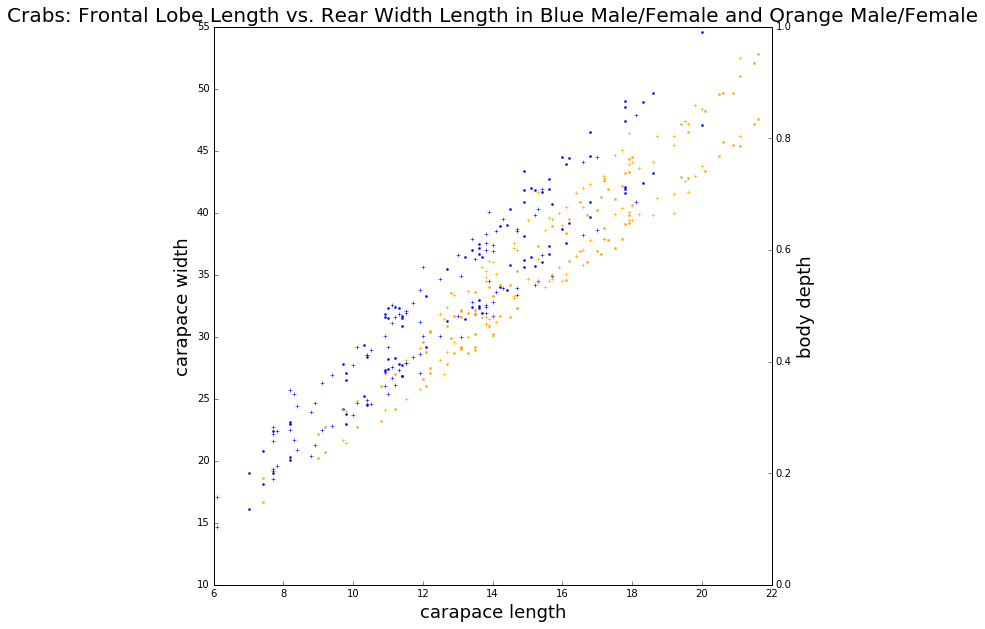

In [19]:
#create the figure and set the figure size 
fig = plt.figure(figsize=(10,10))

#create a grid of 1 row and 1 column for the plot
#[left, bottom, width, target]
gs = mpl.gridspec.GridSpec(1,1) #specifies geometry of the grid that a subplot will be placed

#put a plot in the first row, first column
ax = fig.add_subplot(gs[0])

#Have only two spines visible and set properties
#x axis
ax.spines['top'].set_visible(False) #top axis invisible
ax.spines['bottom'].set_linewidth(0.5) #bottom axis line width
ax.xaxis.set_ticks_position('bottom') #set ticks position

#y axis
ax.spines['right'].set_visible(False) #right axis invisible
#ax.spines['left'].set_linewidth(0.5) #left axis line width 
ax.yaxis.set_ticks_position('left') #set ticks position 
#twinx
ax2 = ax.twinx()

#set tick properties; major tick lines, of length 2, and size of label is 6
#ax.xaxis.set_tick_params('major', length = 2, labelsize = 6)
#ax.yaxis.set_tick_params('major', length = 2, labelsize = 6)

#set the title 
plt.title('Crabs: Frontal Lobe Length vs. Rear Width Length in Blue Male/Female and Orange Male/Female', fontsize = 20)

#plot data and customize look for plot
ax.plot(maleBBD,maleBC, marker = '.', color = 'b', linestyle = '', markersize = 4, clip_on = False)
ax.plot(femaleBBD,femaleBC, marker = '+', color = 'b', linestyle = '', markersize = 4, clip_on = False)
ax.plot(maleOBD,maleOC, marker = '.', color = 'orange', linestyle = '', markersize = 4, clip_on = False)
ax.plot(femaleOBD,femaleOC, marker = '+', color = 'orange', linestyle = '', markersize = 4, clip_on = False)


#set axis limits
#ax.set_xlim((-2, 12))
#ax.set_ylim((-2, 12))

#scale the view to show all the datapoints
ax.autoscale_view()

#set labels
ax.set_xlabel('carapace length', fontsize = 18, family = 'sans-serif')
ax.set_ylabel('carapace width', fontsize = 18, family = 'sans-serif')
ax2.set_ylabel('body depth', fontsize = 18)

fig.savefig('mpl_template.svg')